In [1]:
#Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading the inputs
PATH = "D:/Learning/Resume_Projects/Mercari Price Suggestion Challenge/input/"
train = pd.read_csv(f'{PATH}train.tsv', sep='\t')
test = pd.read_csv(f'{PATH}test.tsv', sep='\t')

In [3]:
# size of training and dataset
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [4]:
#Quick glipmse of the data
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
#Checking data types. The files has numeric and string values
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [6]:
#checking for null values: There are null values in category_name, brand_name and item_description
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

In [18]:
#Checking the target value
print("The mean of the price is %d " % train.price.mean())
print("The median of the price is %d " % train.price.median())
print("The difference b/w them is %d " % (train.price.mean()- train.price.median()))
print("The maximum price is %d and the minimum price is %d" % (train.price.max(), train.price.min()))

The mean of the price is 26 
The median of the price is 17 
The difference b/w them is 9 
The maximum price is 2009 and the minimum price is 0


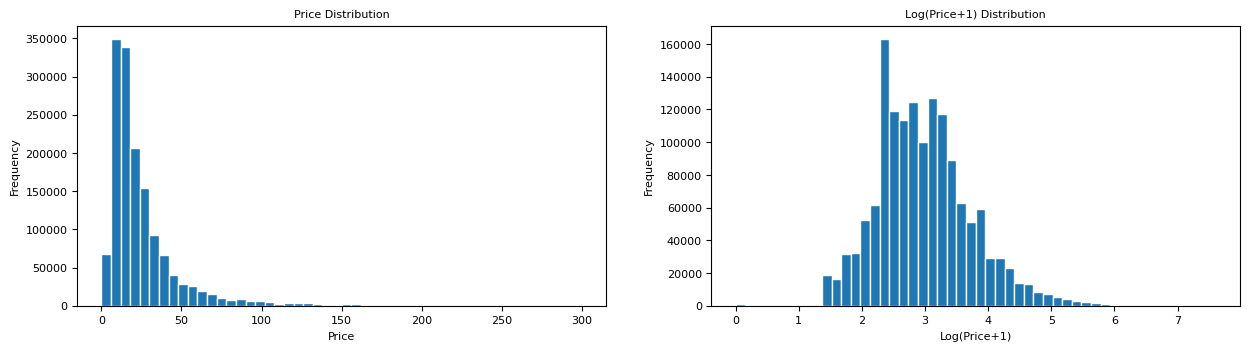

In [7]:
# Below Plot shows the of price where its how heavy skewness as well as variation.
plt.subplot(2, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(15,8), edgecolor='white',range=[0,300])
plt.xlabel('Price', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tick_params(labelsize=8)
plt.title('Price Distribution', fontsize=8)

#plotting a log-transformation of price help us reduce the skewness as well as normalize the price distrution. Also adding +1 to deal with the 0 and negative values.
plt.subplot(2, 2, 2)
(np.log(train['price']+1)).plot.hist(bins=50, figsize=(15,8), edgecolor='white')
plt.xlabel('Log(Price+1)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tick_params(labelsize=8)
plt.title('Log(Price+1) Distribution', fontsize=8)
plt.show()

In [8]:
print("%d unique category and %d unique brands" % (train['category_name'].nunique(), train['brand_name'].nunique()))

1287 unique category and 4809 unique brands


In [9]:
 #Replace missing values with "No Label"
train['category_name'].fillna("No Label", inplace=True)

C:\Users\Bishwajit\AppData\Local\Temp\ipykernel_11524\4080806465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['category_name'].fillna("No Label", inplace=True)


In [10]:
#splitting the category data into 3 to get a column for each category
def split_categories(text):
    categories = text.split('/')
    if len(categories) >= 3:
        return pd.Series([categories[0], categories[1], categories[2]])
    elif len(categories) == 2:
        return pd.Series([categories[0], categories[1], None])
    else:
        return pd.Series([categories[0], None, None])

# Apply the function to create new columns
train[['First_cat', 'Second_cat', 'Third_cat']] = train['category_name'].apply(split_categories)

#checking for unique values 
print("%d unique 1st category, %d unique 2nd category and %d unique 3rd category" % (train['First_cat'].nunique(), train['Second_cat'].nunique(), train['Third_cat'].nunique()))


11 unique 1st category, 113 unique 2nd category and 870 unique 3rd category


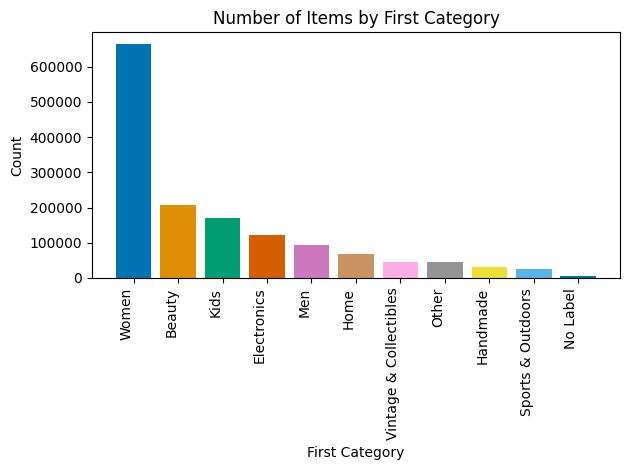

In [11]:
# Bar Plots for First Category
colors = sns.color_palette("colorblind", 10)
category_column = train['First_cat']
category_counts = category_column.value_counts()
plt.bar(category_counts.index, category_counts.values, color=colors) # type: ignore
plt.xlabel('First Category')
plt.ylabel('Count')
plt.title('Number of Items by First Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

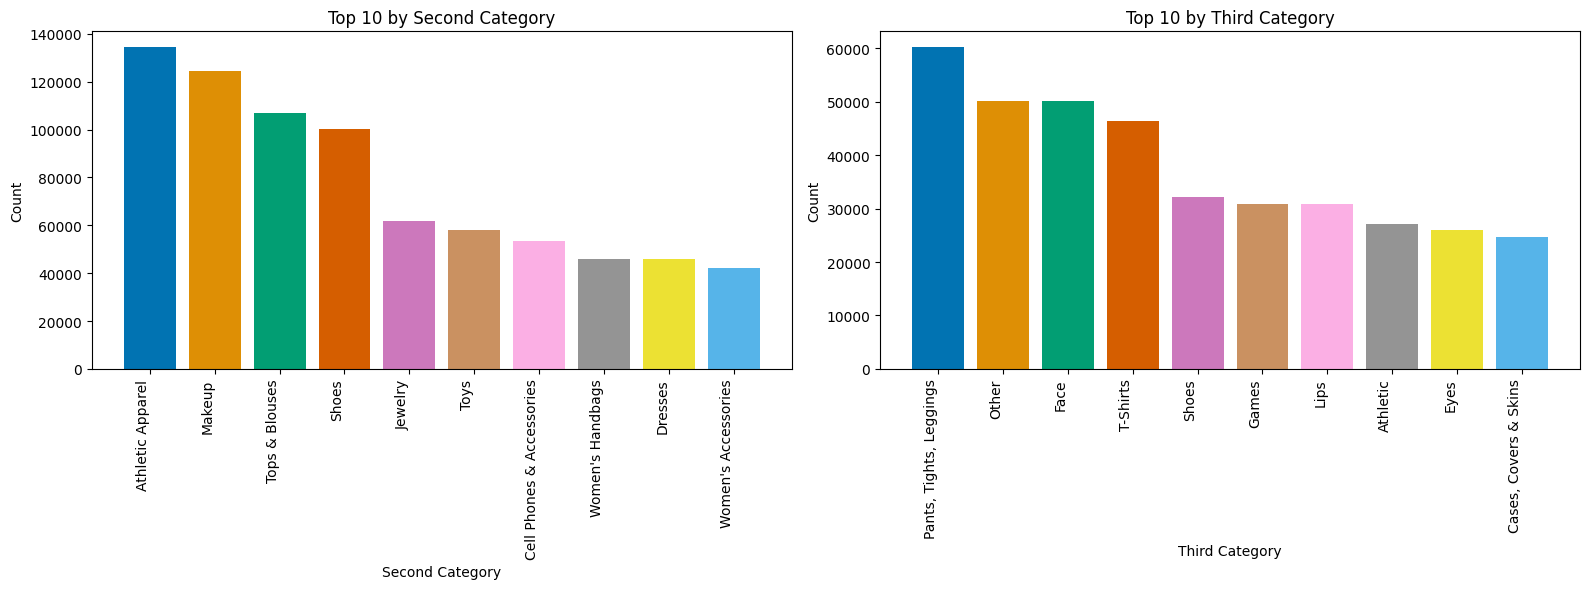

In [12]:
# Bar Plots for Top 10 Second Category
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
category_column1 = train['Second_cat']
category_counts1 = category_column1.value_counts()
top_10_categories1 = category_counts1.head(10)
plt.bar(top_10_categories1.index, top_10_categories1.values, color=colors) # type: ignore
plt.xlabel('Second Category')
plt.ylabel('Count')
plt.title('Top 10 by Second Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.subplot(1,2,2)
category_column2 = train['Third_cat']
category_counts2 = category_column2.value_counts()
top_10_categories2 = category_counts2.head(10)
plt.bar(top_10_categories2.index, top_10_categories2.values, color=colors) # type: ignore
plt.xlabel('Third Category')
plt.ylabel('Count')
plt.title('Top 10 by Third Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

Top 10 Brands by Count of Brands, with Total Price, Count, and Average Percentage:
                   total_price  brand_count  average_percentage
brand_name                                                     
PINK                 1424749.0        54088           26.341314
Nike                 1662377.0        54043           30.760265
Victoria's Secret    1115121.5        48036           23.214287
LuLaRoe              1044515.0        31024           33.667967
Apple                1269159.0        17322           73.268618
FOREVER 21            196354.0        15186           12.929935
Nintendo              520332.0        15007           34.672619
Lululemon             685634.0        14558           47.096717
Michael Kors          867084.5        13928           62.254775
American Eagle        211546.5        13254           15.960955


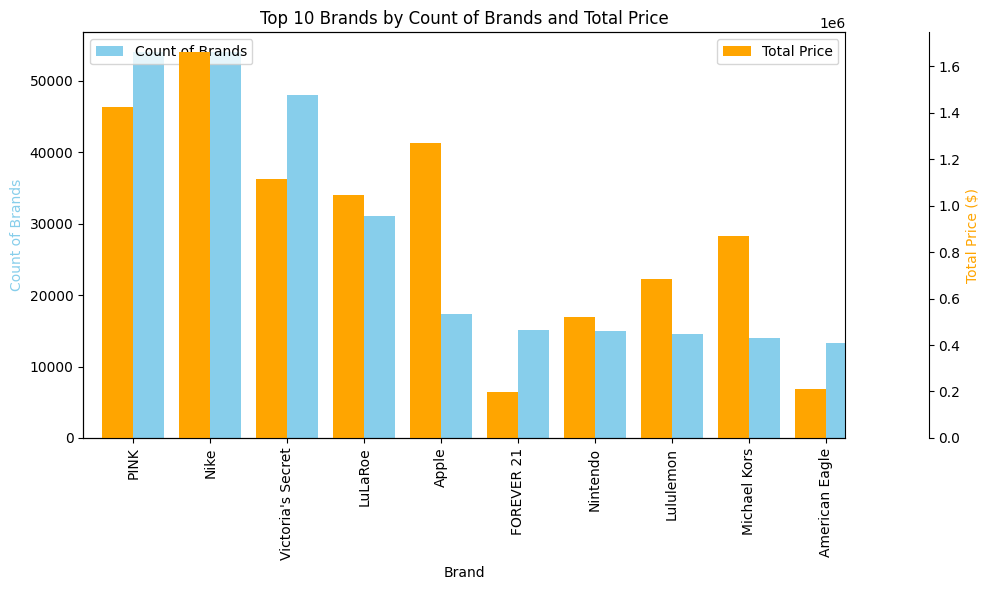

In [37]:
# Grouping by 'brand' and calculating the sum of prices and count of brands for each brand. We can see Apple has the highest per unit price and Forever 21 has the lowest.
brand_summary = train.groupby('brand_name').agg({'price': ['sum', 'count']})
brand_summary.columns = ['total_price', 'brand_count']
brand_summary['average_percentage'] = (brand_summary['total_price'] / brand_summary['brand_count'])
top_10_brands = brand_summary.nlargest(10, 'brand_count')

# Printing the top 10 brands with sum of prices, counts, and average percentage
print("Top 10 Brands by Count of Brands, with Total Price, Count, and Average Percentage:")
print(top_10_brands)



# Plotting the count of brands and total price on the same axis
fig, ax1 = plt.subplots(figsize=(10, 6))
top_10_brands['brand_count'].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)

# Adding labels and title for the left y-axis
ax1.set_xlabel('Brand')
ax1.set_ylabel('Count of Brands', color='skyblue')
ax1.set_title('Top 10 Brands by Count of Brands and Total Price')

# Creating a second y-axis for total price
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Move the second y-axis to the right for better visibility

# Plotting the total price on the right y-axis
top_10_brands['total_price'].plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)

# Adding labels for the right y-axis
ax2.set_ylabel('Total Price ($)', color='orange')

# Adding legend
ax1.legend(['Count of Brands'], loc='upper left')
ax2.legend(['Total Price'], loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


Top 10 Brands by Count of Brands, with Total Price, Count, and Logarithm of Price:
                   brand_count  total_price  log_price
brand_name                                            
PINK                     54088    1424749.0   3.271139
Nike                     54043    1662377.0   3.426224
Victoria's Secret        48036    1115121.5   3.144768
LuLaRoe                  31024    1044515.0   3.516547
Apple                    17322    1269159.0   4.294132
FOREVER 21               15186     196354.0   2.559545
Nintendo                 15007     520332.0   3.545950
Lululemon                14558     685634.0   3.852203
Michael Kors             13928     867084.5   4.131235
American Eagle           13254     211546.5   2.770145


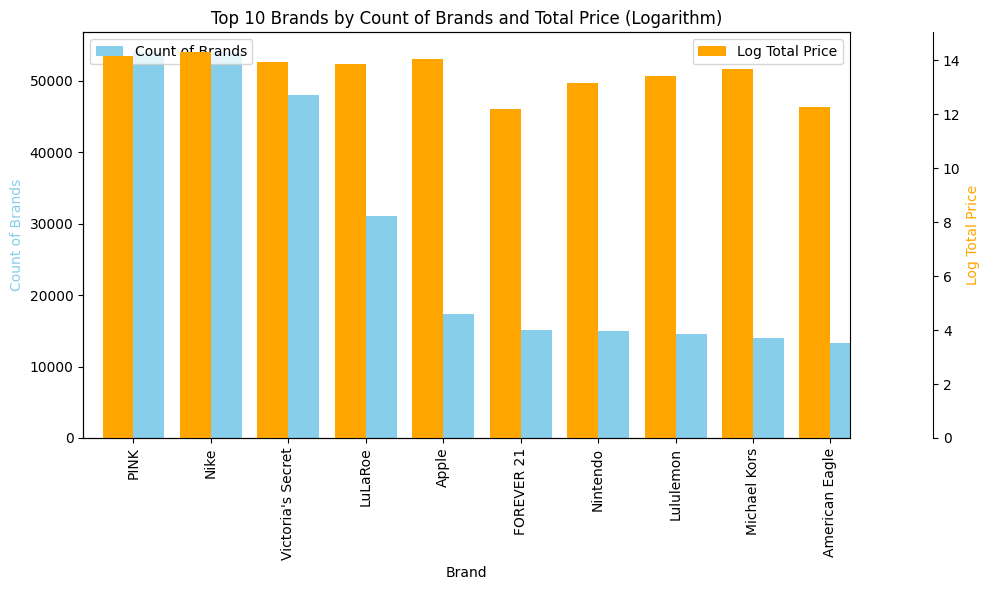

In [41]:
#Normalizing The price
brand_summary = train.groupby('brand_name').agg({'price': ['sum', 'count']})
brand_summary.columns = ['total_price', 'brand_count']

brand_summary['log_total_price'] = brand_summary['total_price'].apply(lambda x: max(0, x)).apply(np.log)
brand_summary['log_price'] = brand_summary['total_price'] / brand_summary['brand_count']
brand_summary['log_price'] = brand_summary['log_price'].apply(lambda x: max(0, x)).apply(np.log)
top_10_brands = brand_summary.nlargest(10, 'brand_count')

print("Top 10 Brands by Count of Brands, with Total Price, Count, and Logarithm of Price:")
print(top_10_brands[['brand_count', 'total_price', 'log_price']])

fig, ax1 = plt.subplots(figsize=(10, 6))
top_10_brands['brand_count'].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Brand')
ax1.set_ylabel('Count of Brands', color='skyblue')
ax1.set_title('Top 10 Brands by Count of Brands and Total Price (Logarithm)')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))


top_10_brands['log_total_price'] = top_10_brands['total_price'].apply(lambda x: max(0, x)).apply(np.log)
top_10_brands['log_total_price'].plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Log Total Price', color='orange')
ax1.legend(['Count of Brands'], loc='upper left')
ax2.legend(['Log Total Price'], loc='upper right')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


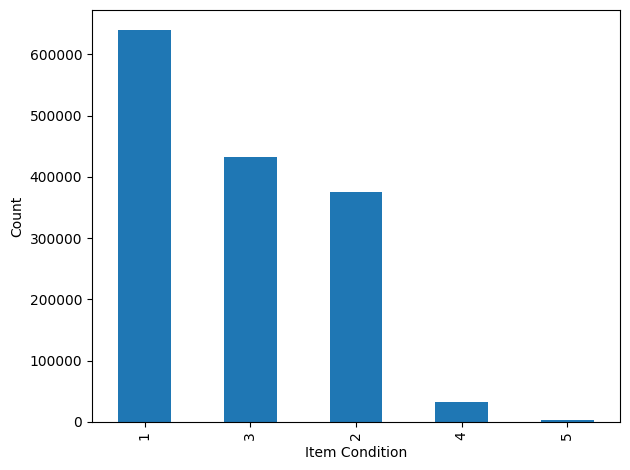

In [13]:
#It can we interperted from below tha the condition for the product are quite imbalanced as well
train["item_condition_id"].value_counts().plot(kind='bar')
plt.xlabel('Item Condition')
plt.ylabel('Count')
plt.tight_layout()

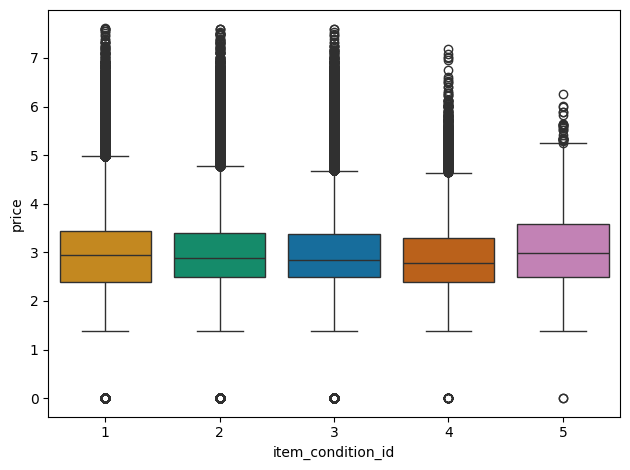

In [14]:
#The distribution of price for each class is focused on 10^3.
colors = sns.color_palette("colorblind", n_colors=len(train['item_condition_id'].unique()))
my_colors = dict(zip(train['item_condition_id'].unique(), colors))

sns.boxplot(data=train, x='item_condition_id', y=np.log(train.price+1), palette=my_colors, hue='item_condition_id', legend=False)
plt.tight_layout()


In [16]:
#The shipping cost burden is decently splitted between sellers and buyers with more than half of the items' shipping fees are paid by the sellers (55%)
round(train["shipping"].value_counts()/len(train)*100,2)

shipping
0    55.27
1    44.73
Name: count, dtype: float64

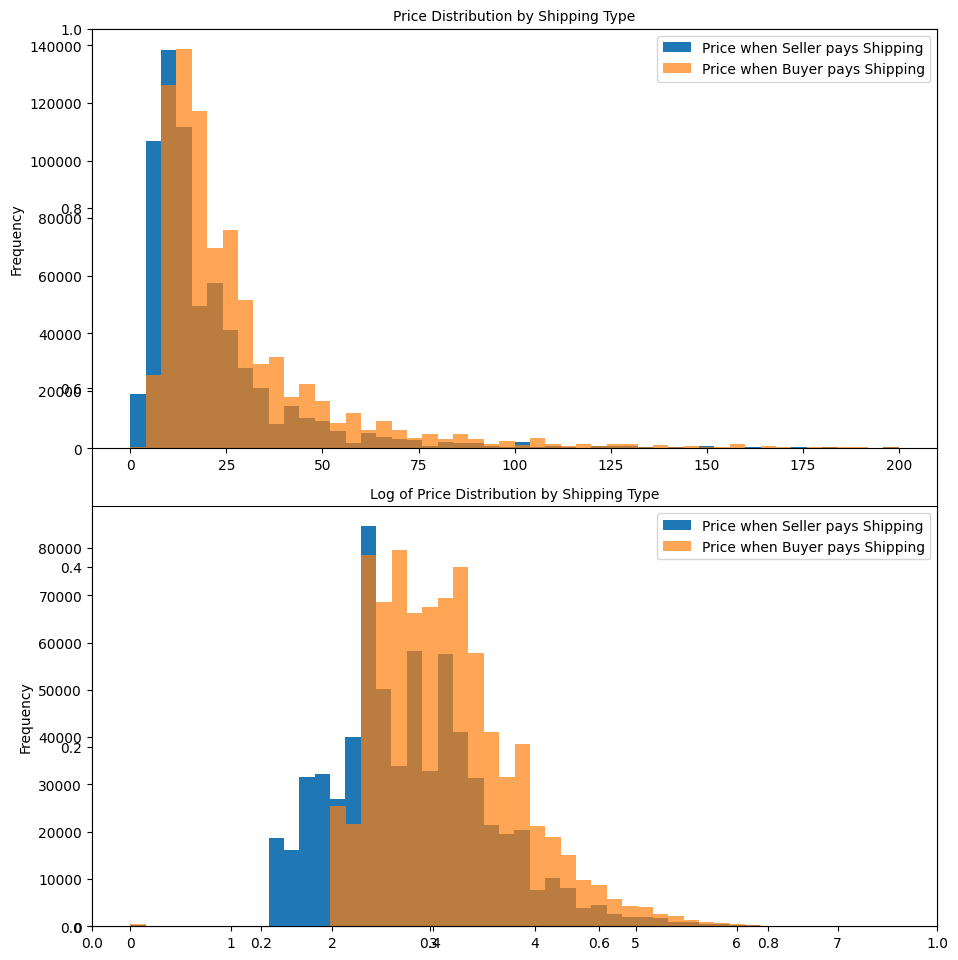

In [17]:
#The graph shows if the product is more expensive the shipping fee is generally paid by the buyer.
seller = train[train.shipping==1]
buyer = train[train.shipping==0]

plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)
seller.price.plot.hist(bins=50, range=[0,200])
buyer.price.plot.hist(alpha=0.7, bins=50,range=[0,200])
plt.legend(['Price when Seller pays Shipping', 'Price when Buyer pays Shipping'])
plt.title('Price Distribution by Shipping Type', fontsize=10)
plt.subplot(2,1,2)
np.log(seller.price+1).plot.hist(bins=50)
np.log(buyer.price+1).plot.hist(alpha=0.7, bins=50)
plt.legend(['Price when Seller pays Shipping', 'Price when Buyer pays Shipping'])
plt.title('Log of Price Distribution by Shipping Type', fontsize=10)
plt.tight_layout()

Top 10 Brands by Count of Brands, with Total Price, Count, and Average Percentage:
                   total_price  brand_count  average_percentage
brand_name                                                     
PINK                 1424749.0        54088           26.341314
Nike                 1662377.0        54043           30.760265
Victoria's Secret    1115121.5        48036           23.214287
LuLaRoe              1044515.0        31024           33.667967
Apple                1269159.0        17322           73.268618
FOREVER 21            196354.0        15186           12.929935
Nintendo              520332.0        15007           34.672619
Lululemon             685634.0        14558           47.096717
Michael Kors          867084.5        13928           62.254775
American Eagle        211546.5        13254           15.960955
